In [51]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [5]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore", FutureWarning)
    # Code that generates FutureWarnings

In [6]:
fish = pd.read_csv('Fish.csv')
fish.head(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274
6,Bream,500.0,26.8,29.7,34.5,14.1795,5.2785
7,Bream,390.0,27.6,30.0,35.0,12.6700,4.6900
8,Bream,450.0,27.6,30.0,35.1,14.0049,4.8438
9,Bream,500.0,28.5,30.7,36.2,14.2266,4.9594


In [7]:
fish.shape

(159, 7)

In [8]:
fish.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [9]:
fish.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


In [10]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [11]:
fish.duplicated().sum()

np.int64(0)

In [12]:
fish.nunique()

Species      7
Weight     101
Length1    116
Length2     93
Length3    124
Height     154
Width      152
dtype: int64

In [13]:
numerical_cols = fish.select_dtypes(include=['int64','float64']).columns.tolist()
non_numerical_cols = fish.select_dtypes(include=['object']).columns.tolist()

print('Numerical column:',numerical_cols)
print('NNone Numerical column:', non_numerical_cols)


Numerical column: ['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']
NNone Numerical column: ['Species']


In [14]:
fish['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [15]:
fish['Species'].value_counts()

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

C:\Users\hp\AppData\Local\Temp\ipykernel_11952\4031559507.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = Species_counts.index, y = Species_counts, ax = axes[0] , palette= 'Set2')


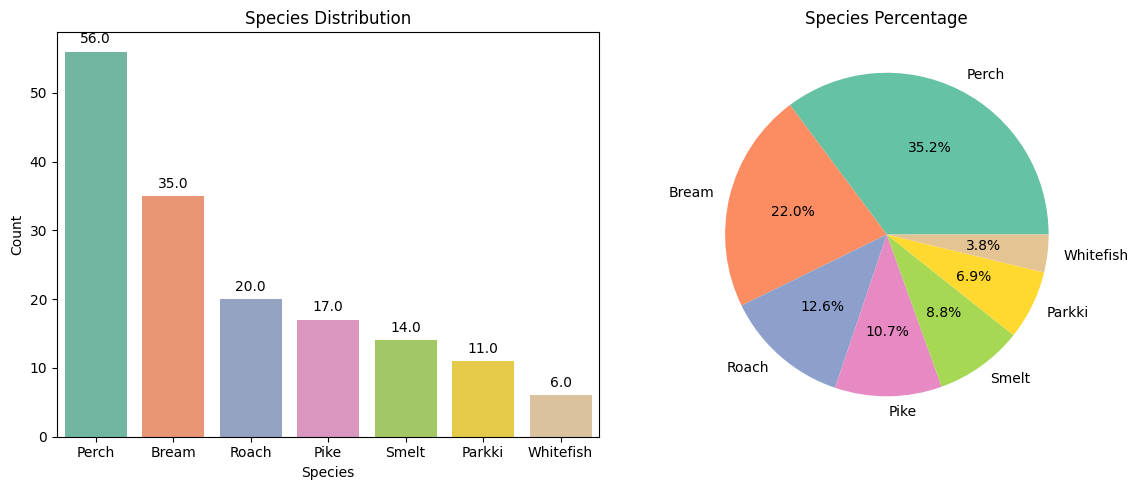

In [16]:
#Univariate Analysis

fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (12,5))
# Bar chart for species distribution
Species_counts = fish['Species'].value_counts()
sns.barplot(x = Species_counts.index, y = Species_counts, ax = axes[0] , palette= 'Set2')
axes[0].set_title('Species Distribution')
axes[0].set_ylabel('Count')
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0,9), textcoords='offset points')

Species_percentage = fish['Species'].value_counts(normalize=True)*100
axes[1].pie(Species_percentage, labels = Species_percentage.index, autopct='%1.1f%%', colors = sns.color_palette('Set2'))
axes[1].set_title('Species Percentage')
plt.tight_layout()
plt.show()

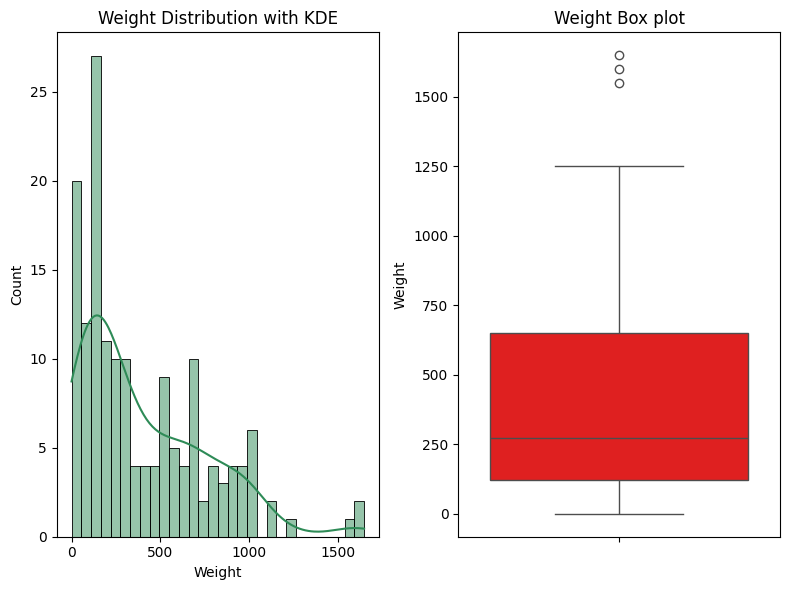

Summary Statistics :, Weight: count     159.000000
mean      398.326415
std       357.978317
min         0.000000
25%       120.000000
50%       273.000000
75%       650.000000
max      1650.000000
Name: Weight, dtype: float64


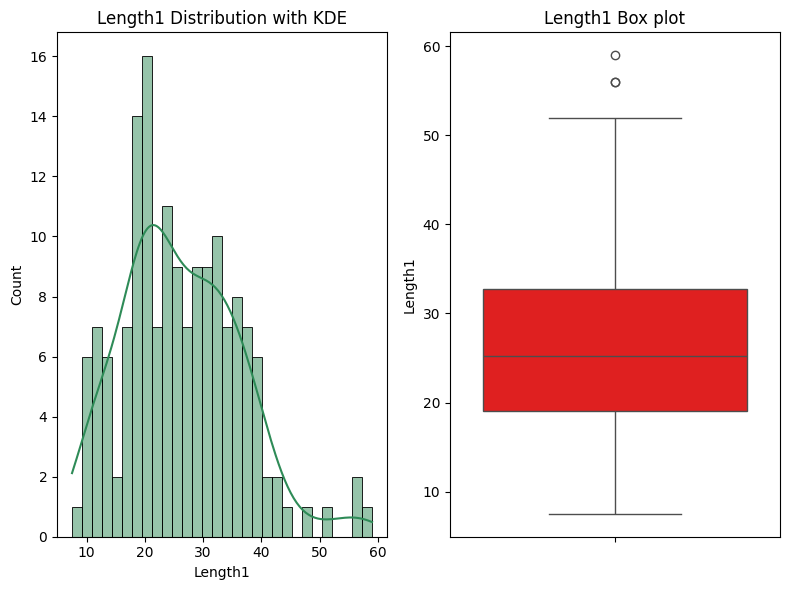

Summary Statistics :, Length1: count    159.000000
mean      26.247170
std        9.996441
min        7.500000
25%       19.050000
50%       25.200000
75%       32.700000
max       59.000000
Name: Length1, dtype: float64


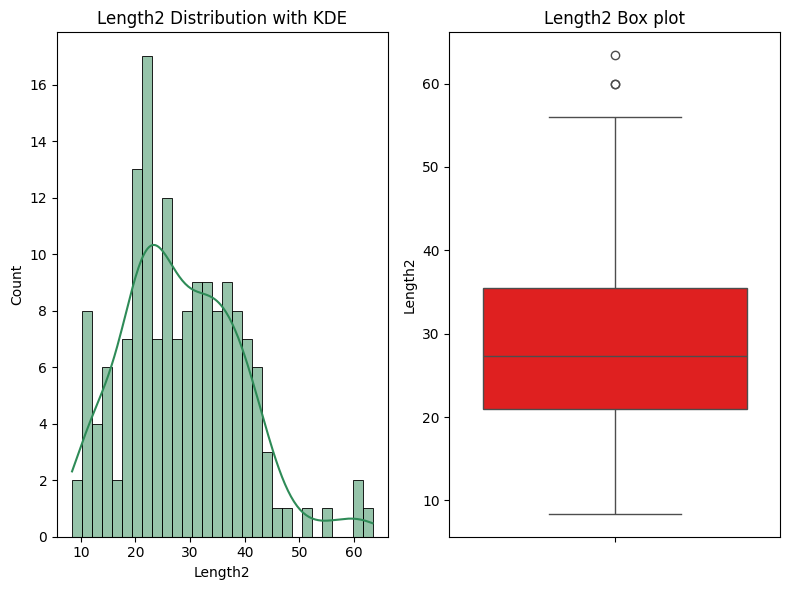

Summary Statistics :, Length2: count    159.000000
mean      28.415723
std       10.716328
min        8.400000
25%       21.000000
50%       27.300000
75%       35.500000
max       63.400000
Name: Length2, dtype: float64


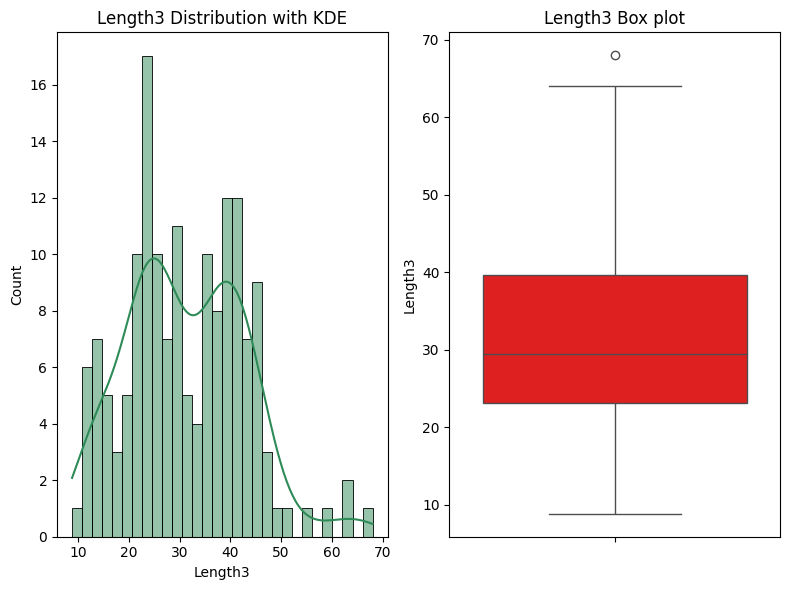

Summary Statistics :, Length3: count    159.000000
mean      31.227044
std       11.610246
min        8.800000
25%       23.150000
50%       29.400000
75%       39.650000
max       68.000000
Name: Length3, dtype: float64


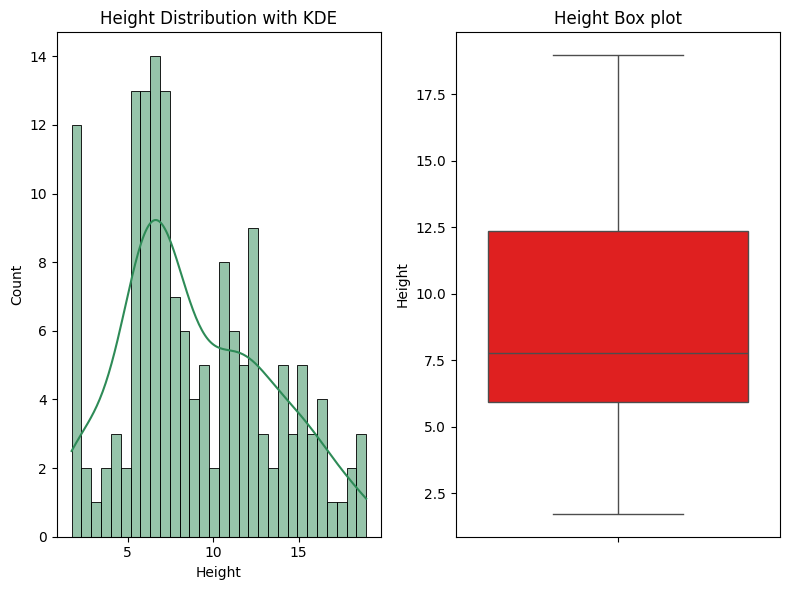

Summary Statistics :, Height: count    159.000000
mean       8.970994
std        4.286208
min        1.728400
25%        5.944800
50%        7.786000
75%       12.365900
max       18.957000
Name: Height, dtype: float64


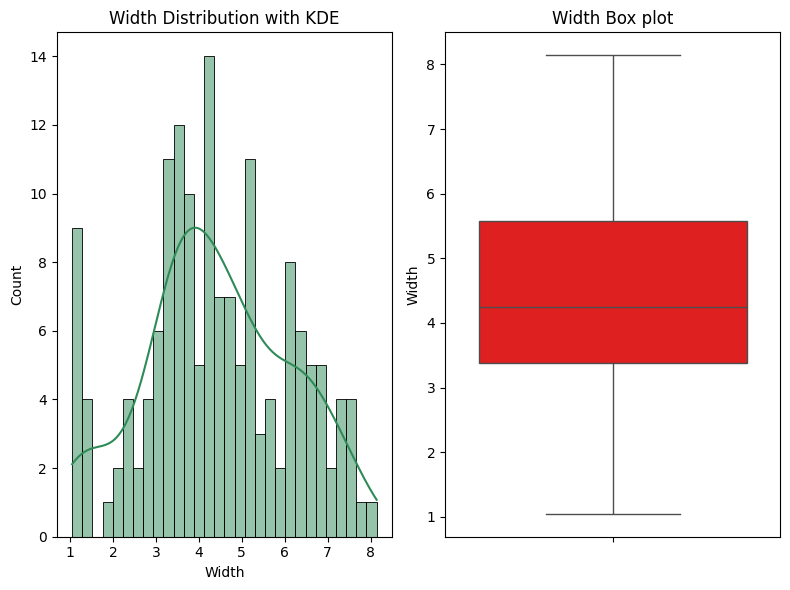

Summary Statistics :, Width: count    159.000000
mean       4.417486
std        1.685804
min        1.047600
25%        3.385650
50%        4.248500
75%        5.584500
max        8.142000
Name: Width, dtype: float64


In [17]:
# Function to perform univariate analysis for numeric columns
def unvariate_analysis(fish, column, title):
    plt.figure(figsize=(8,6))
    
    plt.subplot(1,2,1)
    sns.histplot(fish[column], bins= 30, kde=True, color = 'seagreen')
    plt.title(f'{title} Distribution with KDE')
    
    plt.subplot(1,2,2)
    sns.boxplot(fish[column], color = 'red')
    plt.title(f'{title} Box plot')

    plt.tight_layout()
    plt.show()

    print(f'Summary Statistics :, {title}:',fish[column].describe())
columns_to_analyze = ['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']
for column in columns_to_analyze:
    unvariate_analysis(fish, column, column.replace('_', ''))
    

In [18]:
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


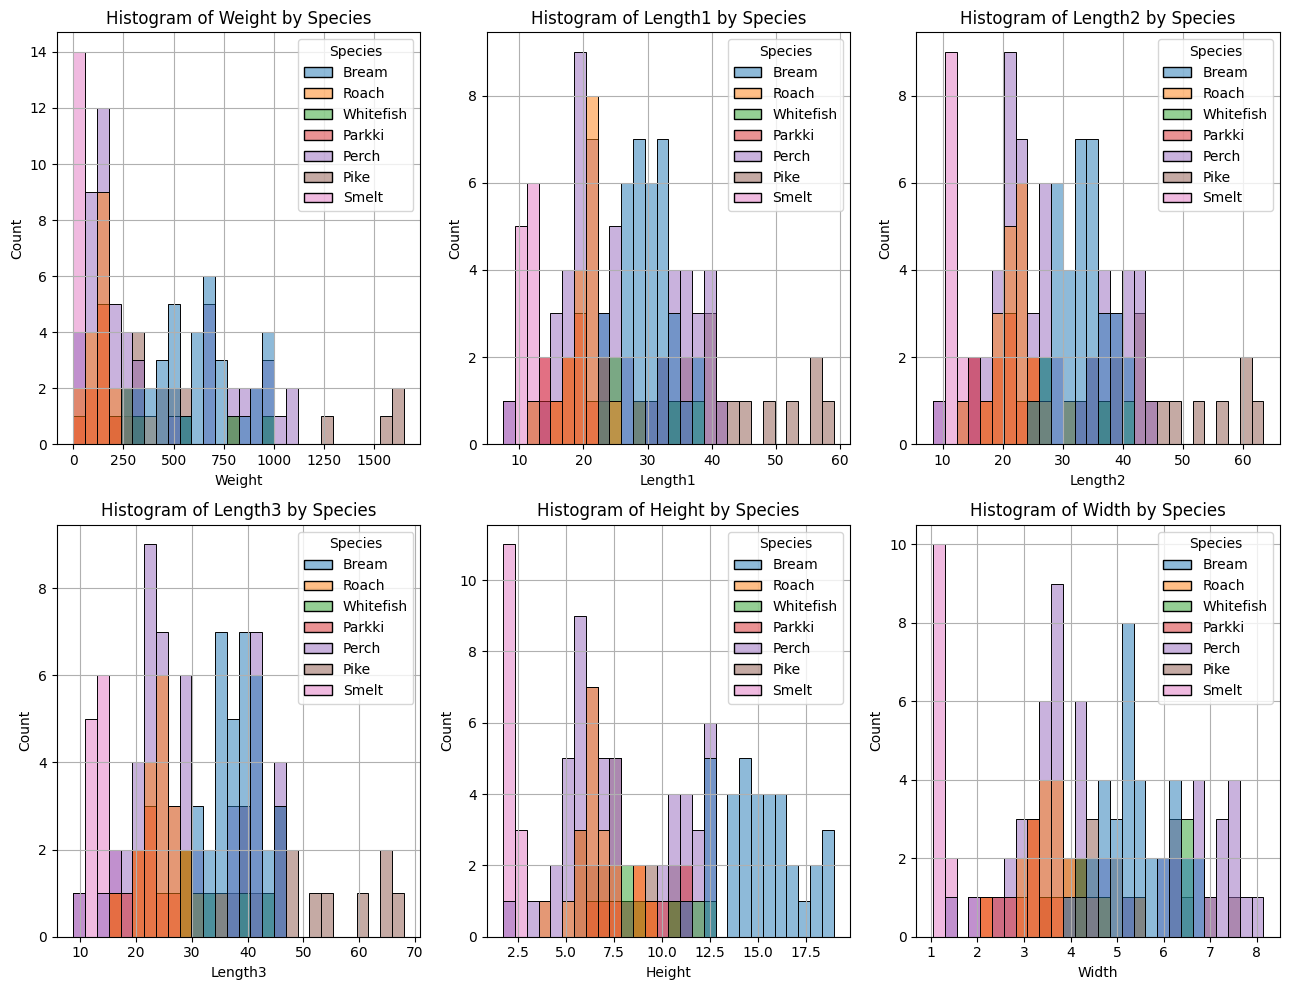

In [19]:
# Create histograms by species for each feature
plt.figure(figsize=(13,10))
for i, column in enumerate(columns_to_analyze,1):
    plt.subplot(2,3,i)
    sns.histplot(data = fish, x = column, hue = 'Species', bins = 28,color =sns.light_palette("seagreen", as_cmap=True))
    plt.xlabel(column)
    plt.grid(True)
    plt.title(f'Histogram of {column} by Species')
plt.tight_layout()
plt.show()

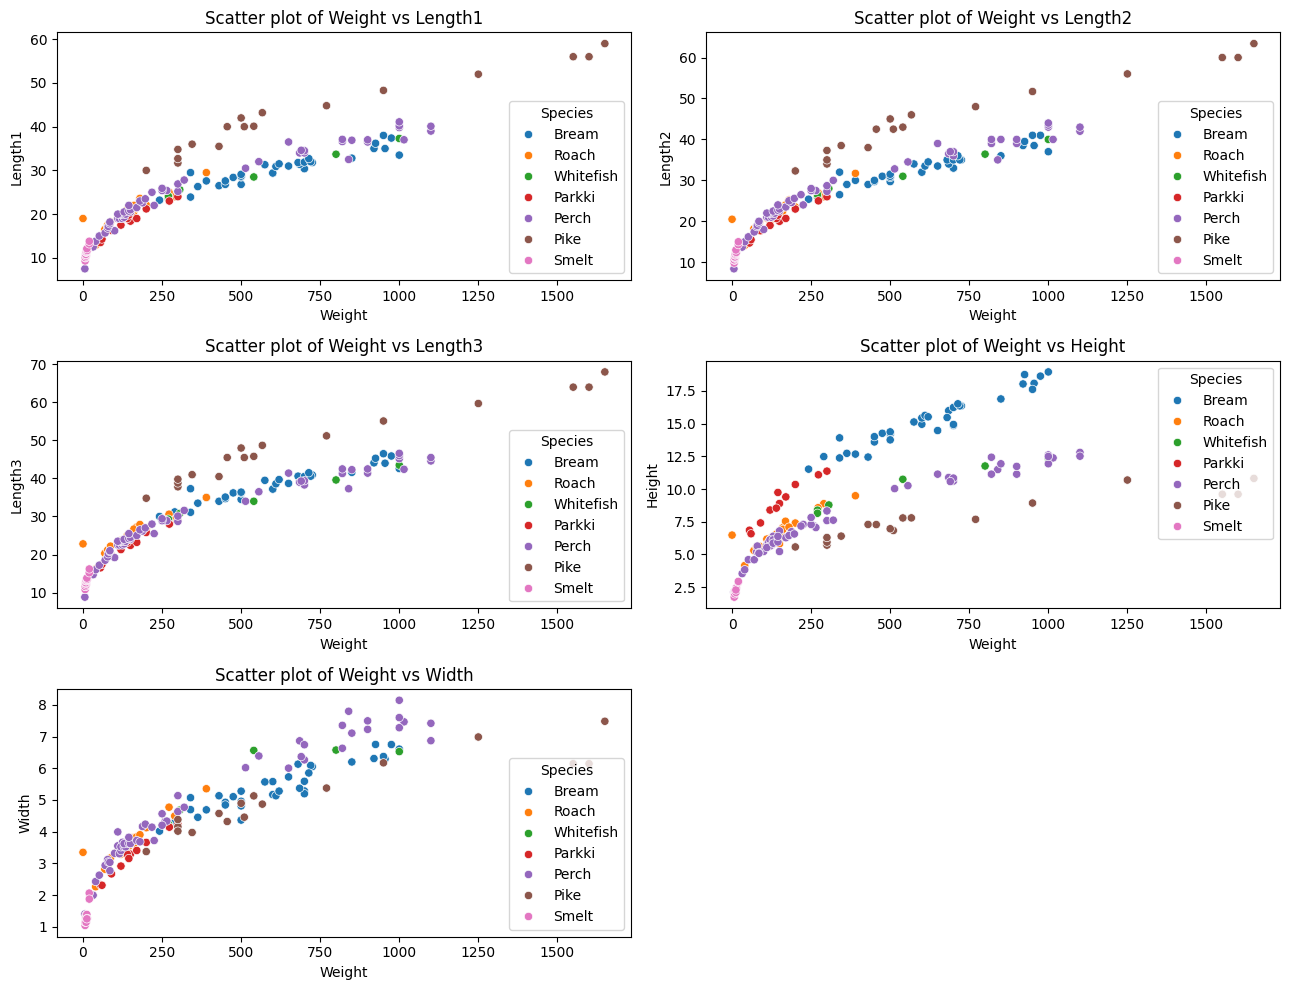

In [20]:
#Create Scatter plot for Feautures
plt.figure(figsize=(13,10))
columns_to_analyze = ['Length1', 'Length2', 'Length3', 'Height', 'Width']
for i, column in enumerate(columns_to_analyze,1):
    plt.subplot(3,2, i)
    sns.scatterplot(data=fish, x ='Weight',y= column, hue = 'Species', color=sns.color_palette("Spectral", as_cmap=True))
    plt.tight_layout()
    plt.title(f'Scatter plot of Weight vs {column}')
    plt.xlabel('Weight')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


In [21]:
#Inspecting invalid data 
invalid_weight_values = fish[fish['Weight'] <= 0]
invalid_weight_values

,Species,Weight,Length1,Length2,Length3,Height,Width
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516


In [22]:
#Drop th invalid data 
fish = fish.drop([40])

In [23]:
fish.shape

(158, 7)

In [24]:
selected_columns = ['Weight','Length1' ,'Length2','Length3','Height','Width']
selected_columns = fish[selected_columns]
selected_columns.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915719,0.918603,0.923090,0.723857,0.886654
Length1,0.915719,1.000000,0.999516,0.992004,0.624409,0.866684
Length2,0.918603,0.999516,1.000000,0.994083,0.639503,0.873201
Length3,0.923090,0.992004,0.994083,1.000000,0.702655,0.878189
Height,0.723857,0.624409,0.639503,0.702655,1.000000,0.792401
Width,0.886654,0.866684,0.873201,0.878189,0.792401,1.000000


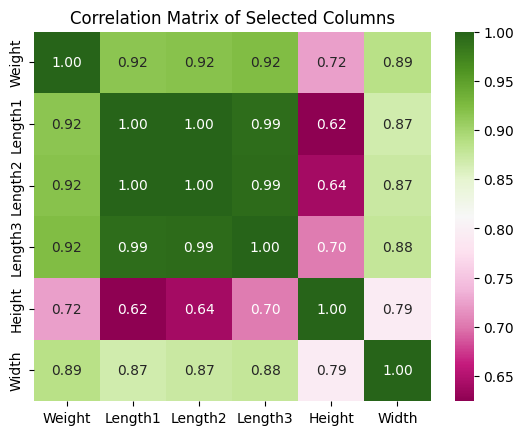

In [25]:
correlation_matrix = selected_columns.corr()
sns.heatmap(correlation_matrix, cmap = 'PiYG', fmt = '.2f',annot = True)
plt.title('Correlation Matrix of Selected Columns')
plt.show()

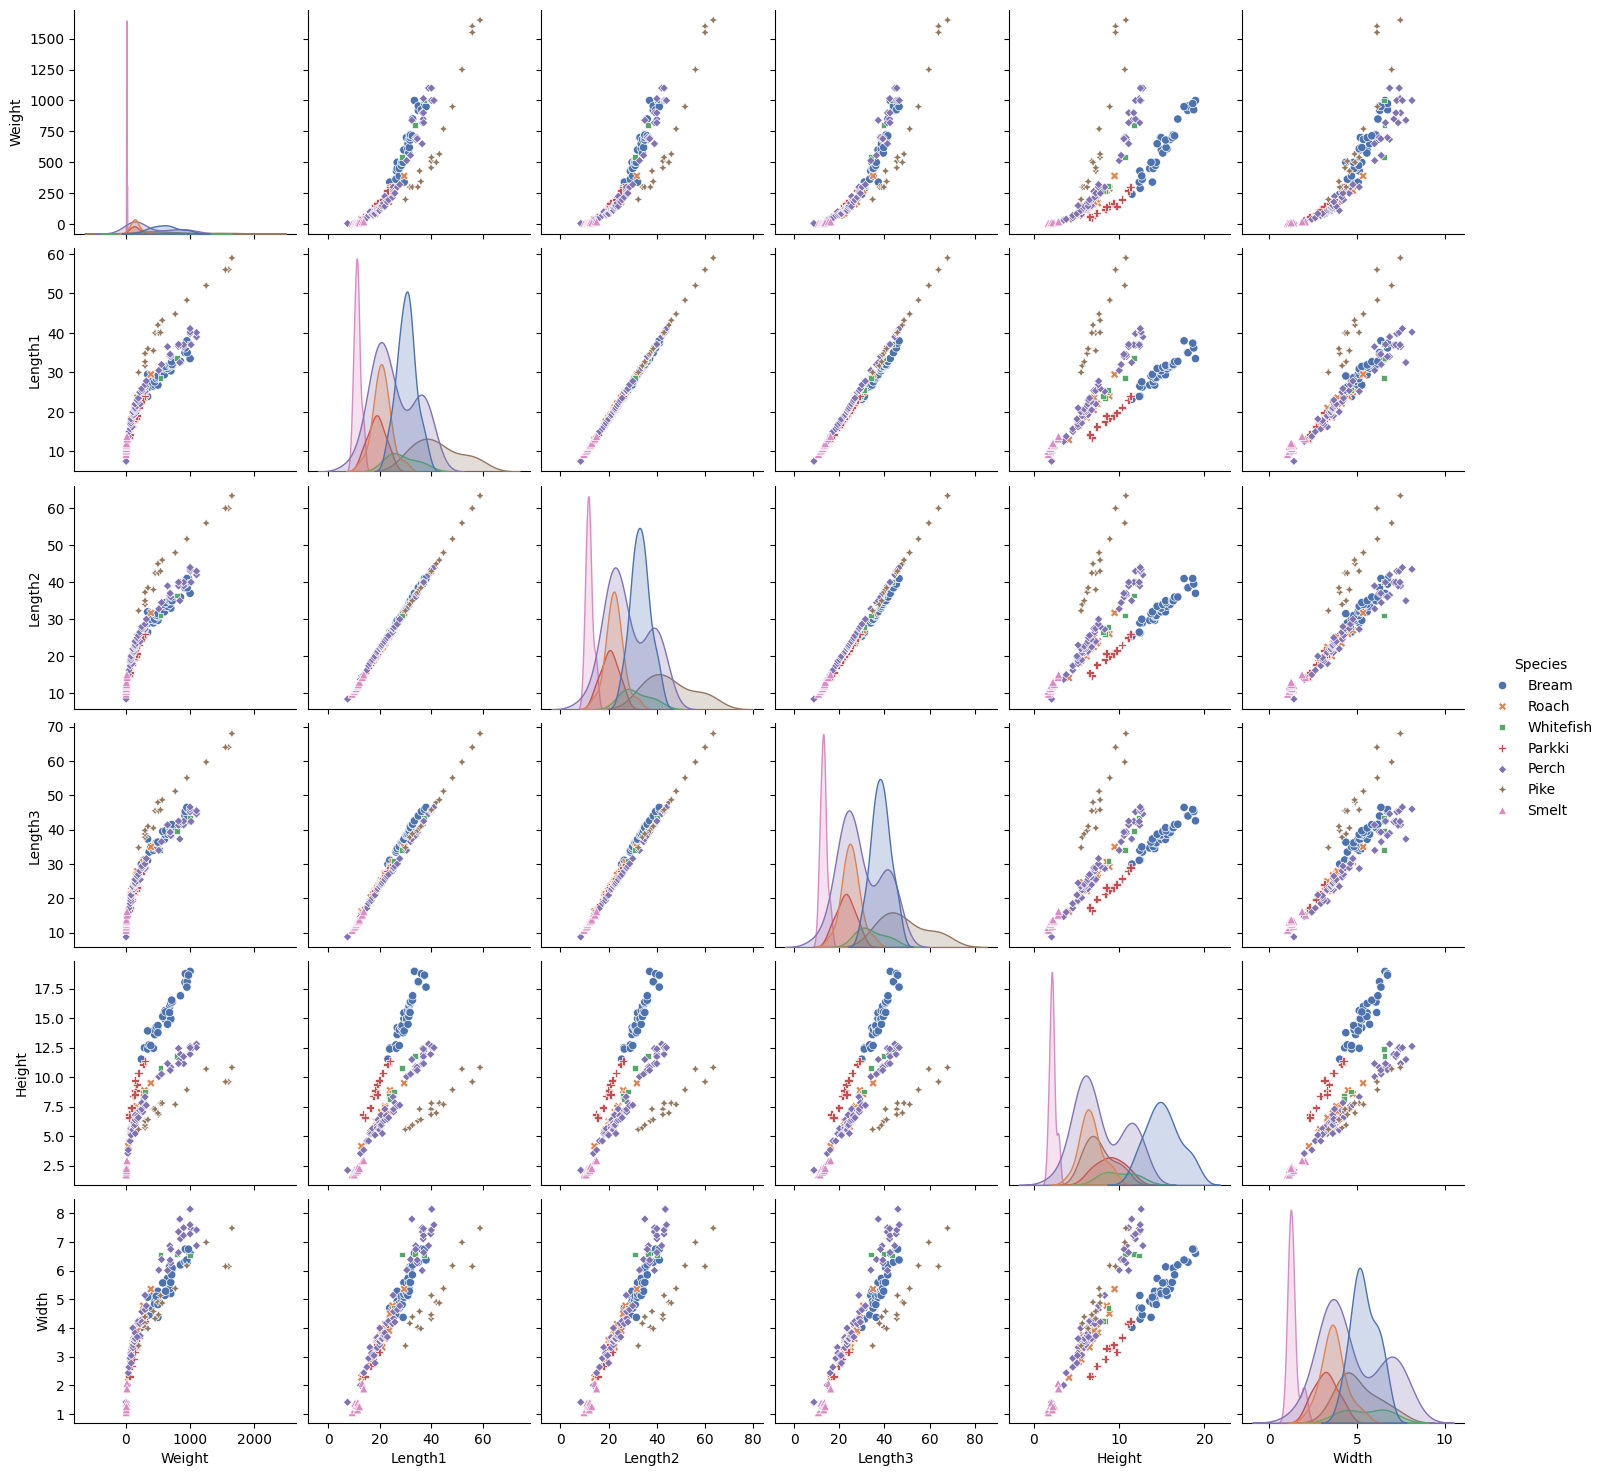

In [26]:
sns.pairplot(data = fish,kind = 'scatter', markers = True, hue = 'Species', palette = 'deep')

In [28]:
#Function to detect data outliers
numerical_columns = fish.select_dtypes(include=['float64', 'int64']).columns
def detect_outliers(data):
    #create Disctionary
    outliers = {}
    for column in data.columns:
        if column in numerical_columns:
            Q1 = data[column].quantile(0.25)
            Q3 = data[column].quantile(0.75)
            IQR = Q3-Q1
            #Defining Lower & upper
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            outliers[column] = fish[(fish[column] < lower_bound) | (fish[column] > upper_bound)].index.tolist()
    return outliers 


# Detect outliers in the fish_data DataFrame
outliers_dict = detect_outliers(fish)


In [30]:
def detect_outliers(data):
    # Select numerical columns from the input data
    numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
    
    # Create dictionary to store outlier indices for each column
    outliers = {}
    
    for column in numerical_columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Find indices of outliers in the column
        outlier_indices = data[(data[column] < lower_bound) | (data[column] > upper_bound)].index.tolist()
        
        outliers[column] = outlier_indices
    
    return outliers

In [31]:
outliers_dict = detect_outliers(fish)

In [33]:
#Display Rows in Weight, length1, length2, length3
outliers_indices = outliers_dict.get('Weight', [])
if len(outliers_indices) == 0:
    print('No outliers found in the columns')
else:
    print('Indices of Outliers in the columns are:',{', '.join(map(str,outliers_indices))})
outliers_weight_values = fish.loc[outliers_indices, 'Weight']
if not outliers_weight_values.empty:
    print(f'Values outliers in weight column values,\n{outliers_weight_values}')

Indices of Outliers in the columns are: {'142, 143, 144'}
Values outliers in weight column values,
142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64


In [34]:
#Display outliers in Length1, Length2, Length3
for column in ['Length1', 'Length2', 'Length3']:
    outliers_indices = outliers_dict.get(column,[])
    if len(column) == 0:
        print(f'No Outlier in {column}')
    else:
        print(f"Indices of Outliers in '{column}' columns: {', ' .join(map(str, outliers_indices))}")

        outliers_length_values = fish.loc[outliers_indices, column]
        if not outliers_length_values.empty:
            print(f'Values outliers in Lengths columns values, \n{outliers_length_values}')
    

Indices of Outliers in 'Length1' columns: 142, 143, 144
Values outliers in Lengths columns values, 
142    56.0
143    56.0
144    59.0
Name: Length1, dtype: float64
Indices of Outliers in 'Length2' columns: 142, 143, 144
Values outliers in Lengths columns values, 
142    60.0
143    60.0
144    63.4
Name: Length2, dtype: float64
Indices of Outliers in 'Length3' columns: 144
Values outliers in Lengths columns values, 
144    68.0
Name: Length3, dtype: float64


In [35]:
fish[141:144]

,Species,Weight,Length1,Length2,Length3,Height,Width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


In [36]:
fish.drop([142,143,144], inplace=True)
fish.shape

(155, 7)

In [37]:
fish.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,155.0,377.638065,319.144511,5.9000,120.00000,272.0000,615.00000,1250.000
Length1,155.0,25.698710,9.133355,7.5000,19.05000,25.0000,32.25000,52.000
Length2,155.0,27.833548,9.806718,8.4000,21.00000,27.0000,35.00000,56.000
Length3,155.0,30.621290,10.711621,8.8000,23.15000,29.3000,39.45000,59.700
Height,155.0,8.967102,4.333722,1.7284,5.92695,7.6800,12.37930,18.957
Width,155.0,4.382326,1.675564,1.0476,3.38565,4.2476,5.47275,8.142


In [38]:
#Isntantiate Label encoder
le = LabelEncoder()

In [40]:
fish['Species']=le.fit_transform(fish['Species'])

In [41]:
fish['Species'].unique()

array([0, 4, 6, 1, 2, 3, 5])

C:\Users\hp\AppData\Local\Temp\ipykernel_11952\2435809741.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Species', data = fish, palette='crest')


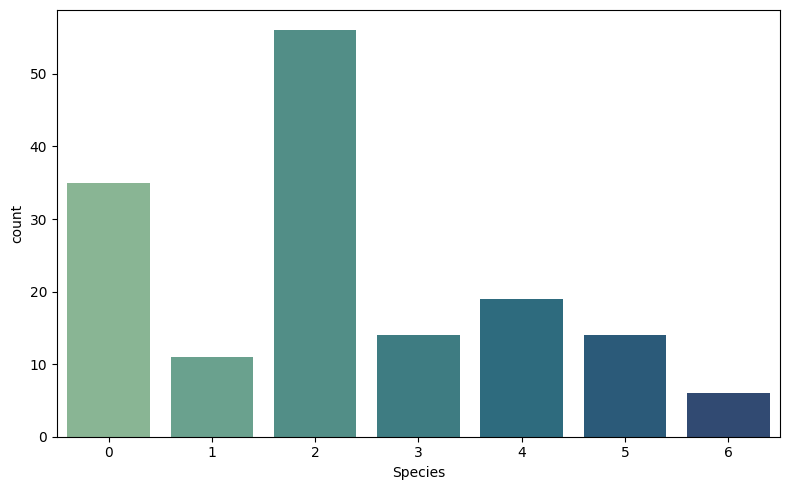

In [42]:
plt.figure(figsize=(8,5))
sns.countplot(x='Species', data = fish, palette='crest')
plt.tight_layout()


In [43]:
X = fish[['Species', 'Length1', 'Length2', 'Length3', 'Height', 'Width']]
y = fish['Weight']


In [44]:
#Model Building (Polynomial Model)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

In [45]:
X_train, x_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state = 42)

In [46]:
# Initialize and train the linear regression model on the transformed features
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [47]:
y_pred = model.predict(x_test)
y_pred

array([ 116.47190974,   10.03052868,  876.99310383,  904.03973326,
        878.54355002,   56.37866967,  119.88829554,    4.9058611 ,
          6.12046628,  219.05731027,   94.62473742,  693.6849357 ,
         92.93899352,   67.97145678,  592.60664916,  605.49114695,
        877.22274966,  129.79069691,  966.13481009,  609.64161422,
        593.75316229,  435.54779895,  493.50656974,  673.50490067,
        286.19075846,  414.49628319,  177.85378176,  155.29145197,
        120.26457935,  132.37510575, 1113.07374211])

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math
from sklearn.model_selection import cross_val_score



In [49]:
#Evaluate The Model
y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred) 
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae, mse, r2

(np.float64(33.277119183449884),
 np.float64(2405.304173780437),
 0.9784781990191583)

In [52]:
# Initialize models
decision_tree = DecisionTreeRegressor(random_state=42)
random_forest = RandomForestRegressor(random_state=42)


In [53]:
# Train Decision Tree Regressor
decision_tree.fit(X_train, y_train)
y_tree_pred = decision_tree.predict(x_test)

# Train Random Forest Regressor
random_forest.fit(X_train, y_train)
y_forest_pred = random_forest.predict(x_test)

In [57]:
#Evaluate the Models
results = {
    'Linear Regression':{
        'MAE': mae,
        'MSE': mse,
        'R2': r2
},
    
        'DecisionTree': {
        'MAE': mean_absolute_error(y_tree_pred, y_test),
        'MSE': mean_squared_error(y_tree_pred, y_test),
         'R2' : r2_score(y_tree_pred, y_test)   
},
        'RandomForest': {
          'MAE': mean_absolute_error(y_forest_pred, y_test),
          'MSE': mean_squared_error(y_forest_pred, y_test),
          'R2' : r2_score(y_forest_pred, y_test)
            
        }}
results_df = pd.DataFrame(results)
results_df

,Linear Regression,DecisionTree,RandomForest
MAE,33.277119,52.580645,38.645097
MSE,2405.304174,6231.463871,3446.236283
R2,0.978478,0.947665,0.969231
